In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [91]:
df = pd.read_csv('stroke.csv')

In [92]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [93]:
df.drop('id',axis=1,inplace=True)

In [94]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [95]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [96]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [97]:
df_continuous = df[['age', 'avg_glucose_level', 'bmi']]

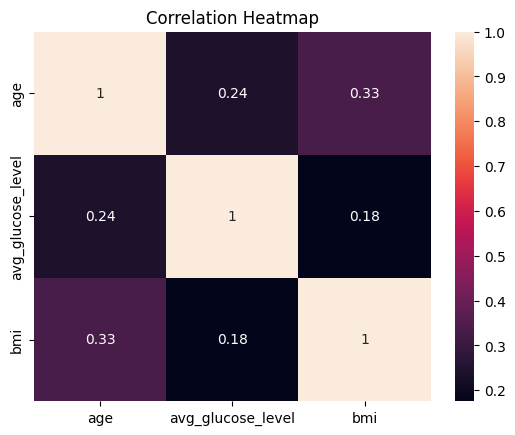

In [98]:
sns.heatmap(df_continuous.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

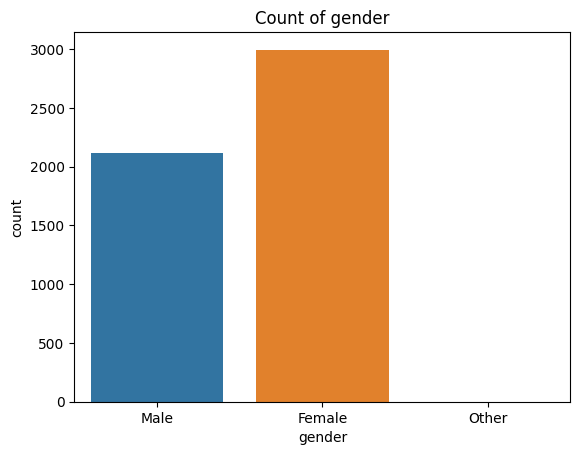

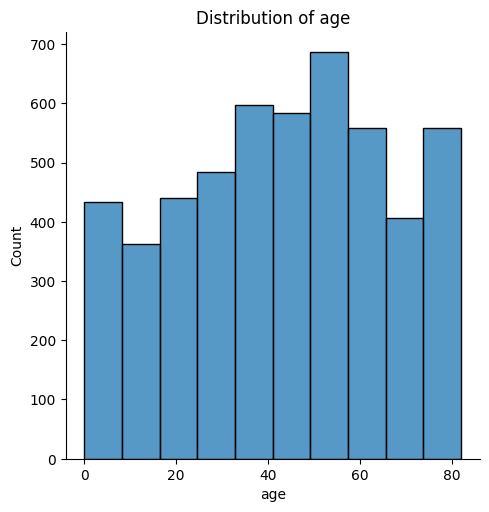

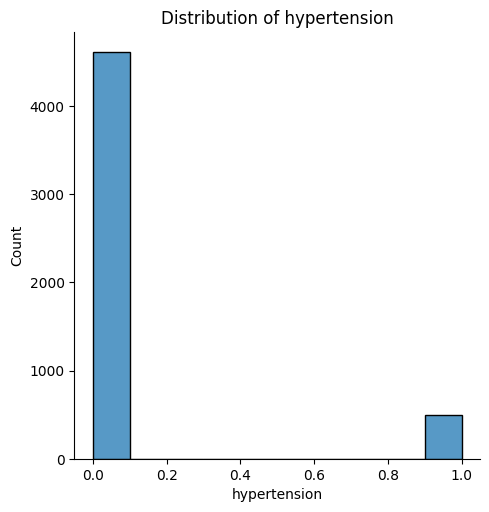

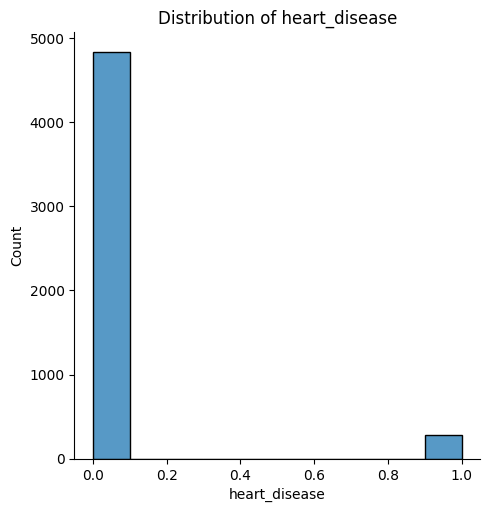

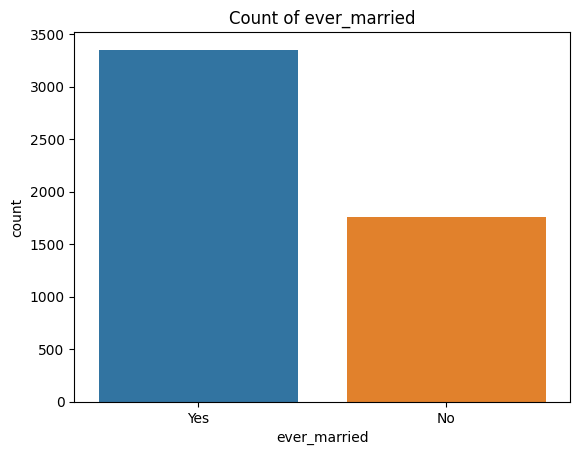

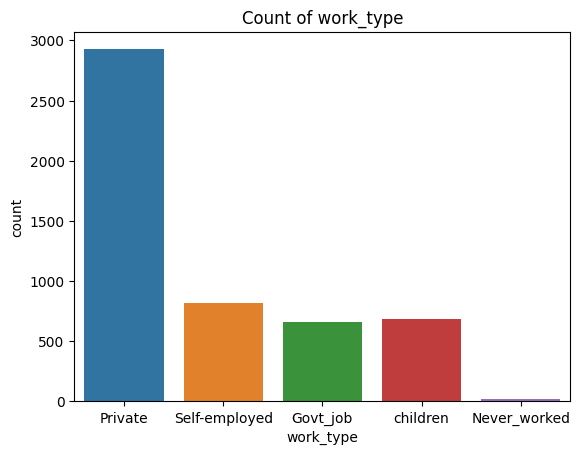

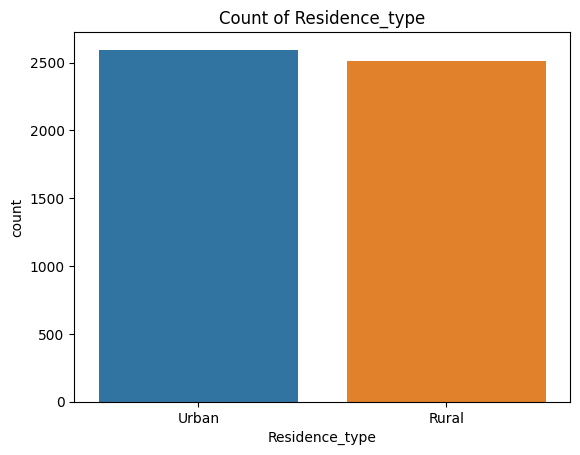

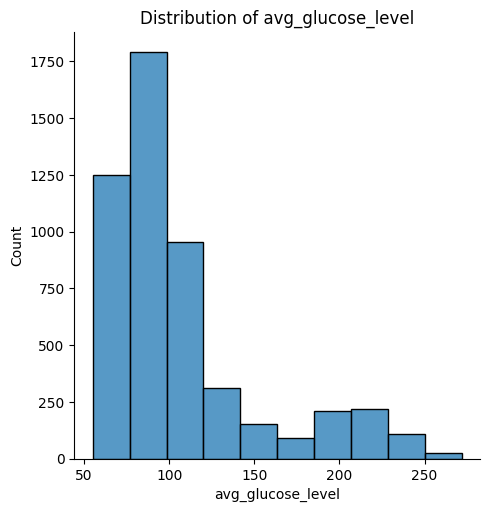

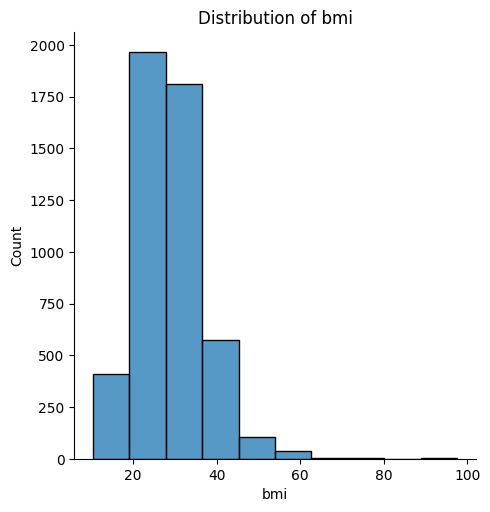

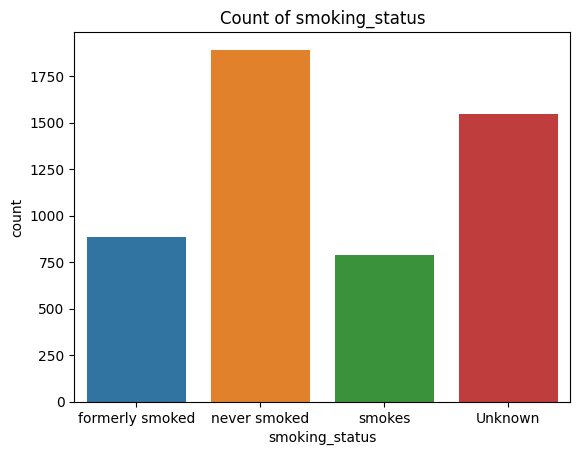

In [99]:
for column in df.columns:
    if column != 'stroke':
        if df[column].dtype != 'O':
            sns.displot(df[column], kde=False, bins=10)
            plt.title(f'Distribution of {column}')
            plt.show()
        else:
            sns.countplot(data=df, x=column)
            plt.title(f'Count of {column}')
            plt.show()

In [100]:
num_other_gender = df[df['gender'] == 'Other'].shape[0]

# Print the number of rows where the gender is 'Other'
print(f'The number of rows where the gender is Other is {num_other_gender}')




The number of rows where the gender is Other is 1


In [101]:
#remove gender = other 
df =df[df['gender'] != 'Other']

In [102]:
bmi_mean = df['bmi'].mean()
print(bmi_mean)

stroke_mean_bmi = df.loc[df['stroke'] == 1, 'bmi'].mean()
print(stroke_mean_bmi)

nonstroke_mean_bmi = df.loc[df['stroke'] == 0, 'bmi'].mean()
print(nonstroke_mean_bmi)

df.loc[(df['stroke'] == 1) & (df['bmi'].isnull()), 'bmi'] = stroke_mean_bmi
df.loc[(df['stroke'] == 0) & (df['bmi'].isnull()), 'bmi'] = nonstroke_mean_bmi

df.isnull().sum()

28.894559902200488
30.471291866028707
28.82443072994254


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

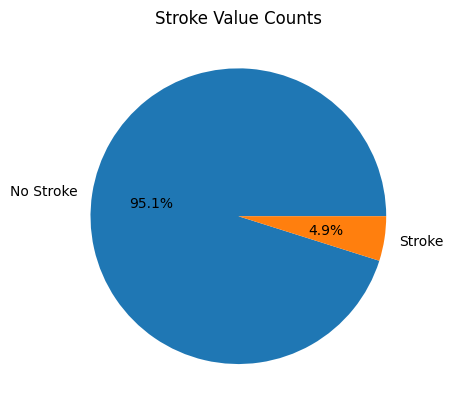

In [103]:
# Plot a pie chart of stroke values before removing unknown smokers
stroke_counts = df['stroke'].value_counts()
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

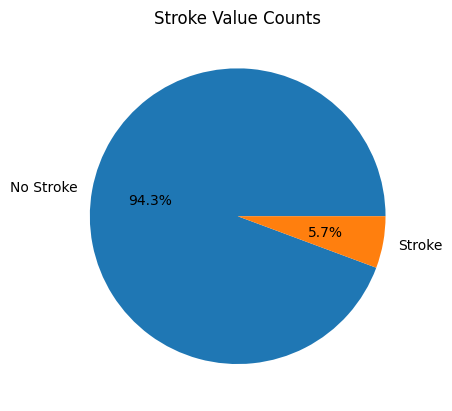

In [104]:
# Removing unknown smokers
df= df[df['smoking_status'] != 'Unknown']
stroke_counts = df['stroke'].value_counts()

# Plot a pie chart of stroke values
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['gender','ever_married','work_type','Residence_type','smoking_status'] 
df[cols] = df[cols].apply(le.fit_transform)

In [106]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,0,1
1,0,61.0,0,0,1,3,0,202.21,30.471292,1,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,2,0,77.93,21.700000,1,0
5105,0,80.0,1,0,1,2,1,83.75,28.824431,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,1,0


In [107]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,0,1
1,0,61.0,0,0,1,3,0,202.21,30.471292,1,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,2,0,77.93,21.700000,1,0
5105,0,80.0,1,0,1,2,1,83.75,28.824431,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,1,0


In [108]:
#Crossing age and bmi due to moderate correlation to capture any interactions
df['age_bmi'] = df['age'] * df['bmi']

In [109]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi
0,1,67.0,0,1,1,2,1,228.69,36.600000,0,1,2452.200000
1,0,61.0,0,0,1,3,0,202.21,30.471292,1,1,1858.748804
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,1,2600.000000
3,0,49.0,0,0,1,2,1,171.23,34.400000,2,1,1685.600000
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,1,1896.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0,57.0,0,0,1,2,0,77.93,21.700000,1,0,1236.900000
5105,0,80.0,1,0,1,2,1,83.75,28.824431,1,0,2305.954458
5106,0,81.0,0,0,1,3,1,125.20,40.000000,1,0,3240.000000
5107,0,35.0,0,0,1,3,0,82.99,30.600000,1,0,1071.000000


## Chi-Squared Statistic
We conduct the Pearson's Chi-Squared Statistic to test for independence between categorical variables. This is to conclude whether two variables (categorical and the target variable stroke) are related to each other. Null Hypothesis (H0): There is no relationship between the variables Alternative Hypothesis (H1): There is a statistically significant relationship between the variables.


In [110]:
#pip install stats

In [111]:
from scipy import stats
chi_table = pd.DataFrame(columns=["Category", "P-Value",'Chi Square Test Stat', "Conclusion"])
def find_dep(p_value): 
    alpha = 0.05
    if p_value <= alpha: 
        return "Dependent (reject H0)"
    else: 
        return "Independent(Do not reject H0)"
## get the 
cat_variables = ["gender", "hypertension", "heart_disease", "ever_married", "work_type","Residence_type","smoking_status"]
chi_lists = []

for column in cat_variables:
    contigency = pd.crosstab(df[column], df['stroke'])
    stat, p_value, dof, expected = stats.chi2_contingency(contigency)
    conclusion = find_dep(p_value)
    each_col = [column, p_value, stat, conclusion]
    chi_lists.append(each_col)

for i in chi_lists:
    chi_table.loc[len(chi_table)] = i
chi_table

,Category,P-Value,Chi Square Test Stat,Conclusion
0,gender,3.919168e-01,0.732987,Independent(Do not reject H0)
1,hypertension,2.141984e-15,62.929876,Dependent (reject H0)
2,heart_disease,3.620020e-14,57.364946,Dependent (reject H0)
3,ever_married,4.838049e-06,20.900355,Dependent (reject H0)
4,work_type,1.648351e-03,17.355633,Dependent (reject H0)
5,Residence_type,6.939923e-01,0.154797,Independent(Do not reject H0)
6,smoking_status,3.197753e-03,11.490614,Dependent (reject H0)


In [112]:
#pip install imbalanced-learn

## Point Biserial Correlation
Point-biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. We use this correlation strategy to see the level of correlation between the continuous variables and the target variable, stroke

In [113]:
biser_table = pd.DataFrame(columns=["Category", "Biserial Stats",'P_value', "Conclusion"])
cont_var = ["age", "avg_glucose_level","bmi"]
bi_lists = []
for var in cont_var:
   stat, p = stats.pointbiserialr(df[var], df["stroke"])
   each_val = [var, stat, p, find_dep(p)]
   bi_lists.append(each_val)

for i in bi_lists:
    biser_table.loc[len(biser_table)] = i
biser_table

,Category,Biserial Stats,P_value,Conclusion
0,age,0.250765,2.989889e-52,Dependent (reject H0)
1,avg_glucose_level,0.128773,1.179848e-14,Dependent (reject H0)
2,bmi,0.013262,4.286100e-01,Independent(Do not reject H0)


## Standardization

In [114]:
#Performing standardization on continuous variables
from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the training data
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

## Hypothesis Testing

In [115]:
numeric = df.select_dtypes(include=np.number).columns.tolist()
tstats_df = pd.DataFrame()
warnings.filterwarnings("ignore")

for eachvariable in numeric:
    tstats = stats.ttest_ind(df.loc[df["stroke"] == 1, eachvariable], df.loc[df["stroke"] == 0, eachvariable])
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ["Variable Name", "T stats", " P-value"]
    tstats_df = pd.concat([tstats_df, temp], axis = 0, ignore_index= True)
tstats_df = tstats_df.sort_values(by=" P-value").reset_index(drop=True)
print(tstats_df)

        Variable Name    T stats   P-value
0              stroke        inf       0.0
1                 age  15.462421       0.0
2             age_bmi  13.159806       0.0
3        hypertension   8.114004       0.0
4       heart_disease   7.785221       0.0
5   avg_glucose_level    7.75112       0.0
6        ever_married   4.669437  0.000003
7      smoking_status  -2.394781  0.016682
8           work_type   1.798387    0.0722
9              gender   0.930103  0.352381
10                bmi   0.791663   0.42861
11     Residence_type    0.46578  0.641402


At the 0.05 significant level, all the variables are statistically significant since the p-value < 0.05

In [116]:
#pip install xgboost

In [117]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot


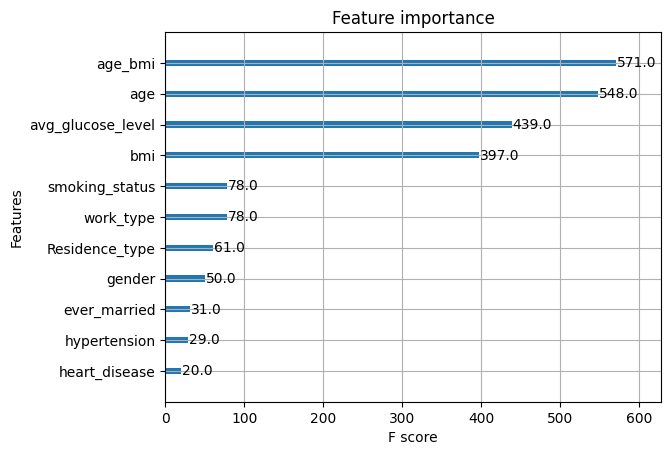

In [136]:

## Feature Importance

import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot

model = XGBClassifier()
model.fit(X_resampled, y_resampled)

plot_importance(model)
pyplot.show()

In [151]:
#removing residence_type
to_drop = ['Residence_type','gender','bmi']
df2= df.drop(to_drop, axis=1)
df2


,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke,age_bmi
0,0.961273,0,1,1,2,2.479202,0,1,2452.200000
1,0.643316,0,0,1,3,1.930834,1,1,1858.748804
2,1.650179,0,1,1,2,-0.063211,1,1,2600.000000
3,0.007403,0,0,1,2,1.289277,2,1,1685.600000
4,1.597186,1,0,1,3,1.349126,1,1,1896.000000
...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,1,2,-0.642849,1,0,1236.900000
5105,1.650179,1,0,1,2,-0.522324,1,0,2305.954458
5106,1.703172,0,0,1,3,0.336054,1,0,3240.000000
5107,-0.734496,0,0,1,3,-0.538062,1,0,1071.000000


# Removing Residence Type

In [152]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

X_df2 = df2.drop('stroke', axis=1)
y_df2 = df2['stroke']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df2, y_df2, test_size=0.3, random_state=109)



In [153]:
#for original data set
from copy import deepcopy
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
0    2339
1     156
Name: stroke, dtype: int64
After resampling: 
0    2339
1    1169
Name: stroke, dtype: int64


In [122]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import  pyplot

In [154]:
# for dataset without Residence Type
from copy import deepcopy
from imblearn.over_sampling import SMOTE


# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled2, y_resampled2 = smote.fit_resample(X_train2, y_train2)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train2.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
0    2339
1     156
Name: stroke, dtype: int64
After resampling: 
0    2339
1    1169
Name: stroke, dtype: int64


## Function to show Model Classification Results

In [155]:
# function to print out model's classification results 
def get_model_results(classifier, model, x_train, y_train, x_test, y_test):
    # fit the model with data 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Results for "+ classifier)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Recall:", metrics.recall_score(y_test,y_pred))
    print("Precision:", metrics.precision_score(y_test,y_pred))
    print("F1 Score:", metrics.f1_score(y_test,y_pred))

    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    print("\nConfusion Matrix:\n")
    print(cfn_matrix)

    # Classification Report 
    print("\nClassification Report:\n")

    print(classification_report(y_test, y_pred))
    
    accuracy = metrics.accuracy_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    results = [accuracy, recall, precision, f1]
    return results

## Ada Boost

In [125]:
# import AdaBoost Model 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report 


In [145]:
grid_params = {
    'n_estimators': [50,100,200,400],
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [0.001,0.05,0.1,0.2],
}

In [146]:
abModel = AdaBoostClassifier(random_state=23)
gridCV = GridSearchCV(abModel, param_grid=grid_params, verbose=False)
gridCV.fit(X_resampled, y_resampled)
print('Best hyper parameters:', gridCV.best_params_, 'Score', gridCV.best_score_)


Best hyper parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 400} Score 0.8269744890286972


In [128]:
good_AB = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.2, algorithm = 'SAMME.R', random_state=23)


In [129]:
get_model_results("Ada Boosting", good_AB, X_resampled, y_resampled, X_test, y_test)

Results for Ada Boosting
Accuracy: 0.8672897196261682
Recall: 0.41304347826086957
Precision: 0.1417910447761194
F1 Score: 0.2111111111111111

Confusion Matrix:

[[ 19  27]
 [115 909]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1024
           1       0.14      0.41      0.21        46

    accuracy                           0.87      1070
   macro avg       0.56      0.65      0.57      1070
weighted avg       0.94      0.87      0.90      1070



[0.8672897196261682,
 0.41304347826086957,
 0.1417910447761194,
 0.2111111111111111]

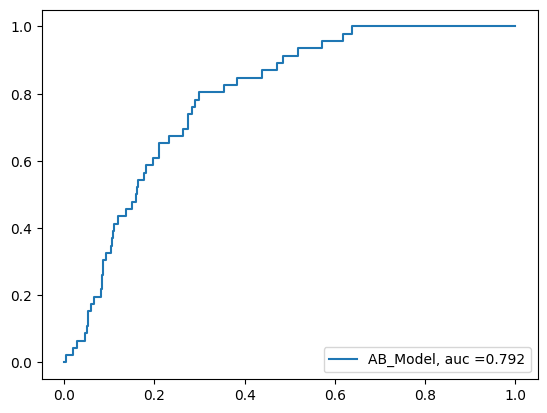

0.7918648097826088

In [130]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodAB = good_AB.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, by_pred_prob_goodAB)
auc = metrics.roc_auc_score(y_test, by_pred_prob_goodAB)
plt.plot(fpr,tpr,label="AB_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()
ab_auc = auc
ab_auc

## Ada Boost Without Residence Type

In [131]:
grid_params = {
    'n_estimators': [50,100,200,400],
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [0.01,0.05,0.1,0.2],
}

In [147]:
abModel = AdaBoostClassifier(random_state=23)
gridCV = GridSearchCV(abModel, param_grid=grid_params, verbose=False)
gridCV.fit(X_resampled2, y_resampled2)
print('Best hyper parameters:', gridCV.best_params_, 'Score', gridCV.best_score_)


Best hyper parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 400} Score 0.803598034553812


In [156]:
AB_dropped = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.2, algorithm = 'SAMME.R', random_state=23)


In [157]:
get_model_results("Ada Boosting", AB_dropped, X_resampled2, y_resampled2, X_test2, y_test2)

Results for Ada Boosting
Accuracy: 0.8616822429906542
Recall: 0.41304347826086957
Precision: 0.1357142857142857
F1 Score: 0.2043010752688172

Confusion Matrix:

[[ 19  27]
 [121 903]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1024
           1       0.14      0.41      0.20        46

    accuracy                           0.86      1070
   macro avg       0.55      0.65      0.56      1070
weighted avg       0.94      0.86      0.89      1070



[0.8616822429906542,
 0.41304347826086957,
 0.1357142857142857,
 0.2043010752688172]

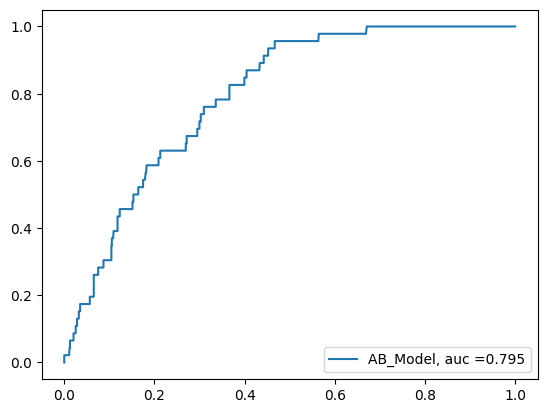

0.7948051120923914

In [158]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodAB = AB_dropped.predict_proba(X_test2)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test2, by_pred_prob_goodAB)
auc = metrics.roc_auc_score(y_test2, by_pred_prob_goodAB)
plt.plot(fpr,tpr,label="AB_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()
ab_auc = auc
ab_auc